In [2]:
%pip install pandas matplotlib seaborn numpy openpyxl

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   --------------- ------------------------ 4.2/11.0 MB 19.4 MB/s eta 0:00:01
   ------------------------------ --------- 8.4/11.0 MB 20.0 MB/s eta 0:00:01
   ---------------------------------------  10.7/11.0 MB 19.7 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 17.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   --------------------- ------------------ 4.5/8.1 MB 20.7 MB/s eta 0:00:01
   -------------------------------------- - 7.9/8.1 MB 20.3 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 18.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   --------------- ------------------------ 5.0/12.8 MB 23.2 MB/s eta 0:00:01
   ----------------------------- ---------- 9.4/12.8 MB 21.7 MB/s eta 0:00:01
   ---------


[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt

# Configuração para os gráficos ficarem bonitos
import seaborn as sns
sns.set_theme(style="whitegrid")

# 1. SIMULAÇÃO DE DADOS (ETL)
# Vamos criar um DataFrame falso com 500 chamados de suporte
# Isso mostra ao recrutador que você sabe gerar e manipular dados brutos.

data = {
    'Ticket_ID': [f'TKT-{1000+i}' for i in range(500)],
    'Categoria': [random.choice(['Login Error', 'Hardware', 'Network', 'Software Access', 'VPN Issue']) for _ in range(500)],
    'Prioridade': [random.choice(['Alta', 'Média', 'Baixa']) for _ in range(500)],
    'Tempo_Resolucao_Horas': [round(random.uniform(1, 48), 2) for _ in range(500)],
    'Satisfacao_Cliente': [random.randint(1, 5) for _ in range(500)]
}

df = pd.read_csv("suporte_log_ficticio.csv") if False else pd.DataFrame(data)

# Visualizar as primeiras linhas
print("Primeiras 5 linhas da base de dados gerada:")
display(df.head())



Primeiras 5 linhas da base de dados gerada:


,Ticket_ID,Categoria,Prioridade,Tempo_Resolucao_Horas,Satisfacao_Cliente
0,TKT-1000,Network,Média,20.99,5
1,TKT-1001,Hardware,Alta,27.60,1
2,TKT-1002,VPN Issue,Alta,31.89,1
3,TKT-1003,Network,Baixa,17.77,1
4,TKT-1004,Hardware,Baixa,1.67,1


In [2]:
# 2. ANÁLISE DE DADOS
# Pergunta 1: Qual a categoria de erro mais comum?
contagem_erros = df['Categoria'].value_counts()

# Pergunta 2: Qual a média de tempo para resolver problemas de Prioridade Alta vs Baixa?
tempo_por_prioridade = df.groupby('Prioridade')['Tempo_Resolucao_Horas'].mean().reset_index()

print("\n--- Resumo Estatístico ---")
print(df.describe())
print("\n--- Contagem por Categoria ---")
print(contagem_erros)


--- Resumo Estatístico ---
       Tempo_Resolucao_Horas  Satisfacao_Cliente
count             500.000000          500.000000
mean               25.818780            2.956000
std                13.568093            1.399278
min                 1.420000            1.000000
25%                14.222500            2.000000
50%                26.595000            3.000000
75%                38.525000            4.000000
max                47.970000            5.000000

--- Contagem por Categoria ---
Categoria
Software Access    113
VPN Issue          106
Network             96
Hardware            94
Login Error         91
Name: count, dtype: int64


C:\Users\Mobilemed\AppData\Local\Temp\ipykernel_14280\2206282634.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  grafico = sns.barplot(x=contagem_erros.index, y=contagem_erros.values, palette="viridis")


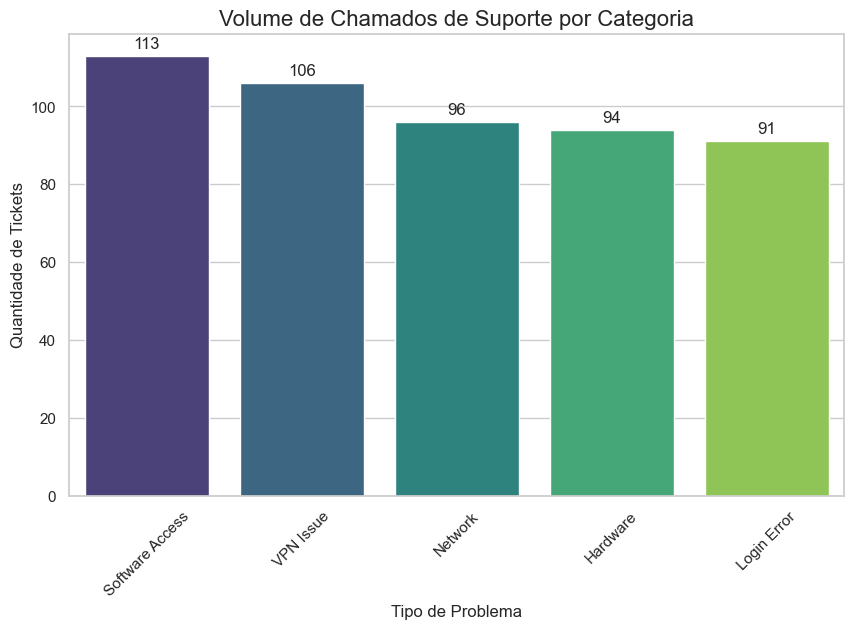

In [3]:
# 3. VISUALIZAÇÃO DOS DADOS
# Vamos criar um gráfico de barras para mostrar o volume de tickets por categoria

plt.figure(figsize=(10, 6))
grafico = sns.barplot(x=contagem_erros.index, y=contagem_erros.values, palette="viridis")

plt.title('Volume de Chamados de Suporte por Categoria', fontsize=16)
plt.xlabel('Tipo de Problema', fontsize=12)
plt.ylabel('Quantidade de Tickets', fontsize=12)
plt.xticks(rotation=45)

# Adicionar os números em cima das barras
for i in range(len(contagem_erros)):
    grafico.text(i, contagem_erros.values[i] + 2, str(contagem_erros.values[i]), ha='center')

plt.show()

In [ ]:
# Atualizando o projeto